<a href="https://colab.research.google.com/github/Yasserashraf1/Predicting-Hazardous-NEOs-Nearest-Earth-Objects-/blob/main/Predicting%20Hazardous%20NEOs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Importing and Cleaning:

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier


In [4]:
df=pd.read_csv("nearest-earth-objects(1910-2024).csv")

In [5]:
df.head(10)

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
5,3656926,(2014 BT8),25.00,0.026580,0.059435,Earth,47477.649832,4.290521e+07,False
6,3421513,(2008 OX1),21.50,0.133216,0.297879,Earth,57853.295346,2.727908e+07,True
7,3541504,(2010 OF101),19.75,0.298233,0.666868,Earth,46972.486794,6.997593e+07,False
8,3836942,(2018 YH),21.70,0.121494,0.271669,Earth,37424.548382,5.657727e+06,True
9,3892166,(2019 UP13),23.45,0.054269,0.121350,Earth,38524.867869,6.166118e+07,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [7]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [8]:
df.isnull()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
338194,False,False,False,False,False,False,False,False,False
338195,False,False,False,False,False,False,False,False,False
338196,False,False,False,False,False,False,False,False,False
338197,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [10]:
df=df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338171 non-null  object 
 6   relative_velocity       338171 non-null  float64
 7   miss_distance           338171 non-null  float64
 8   is_hazardous            338171 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 23.5+ MB


In [12]:
df.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,0
estimated_diameter_min,0
estimated_diameter_max,0
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [13]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
338194,False
338195,False
338196,False
338197,False


In [14]:
df.duplicated().sum()

0

 # 2. Exploratory Data Analysis (EDA):

In [15]:
df['orbiting_body'].value_counts()

,count
orbiting_body,
Earth,338171


In [16]:
df['is_hazardous'].value_counts()

,count
is_hazardous,
False,295009
True,43162


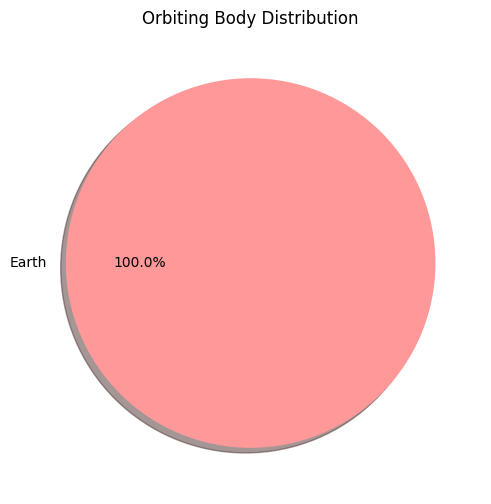

In [17]:
labels = df['orbiting_body'].value_counts().index
sizes = df['orbiting_body'].value_counts()
colors = ['#ff9999'] * len(sizes)

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Orbiting Body Distribution')
plt.show()


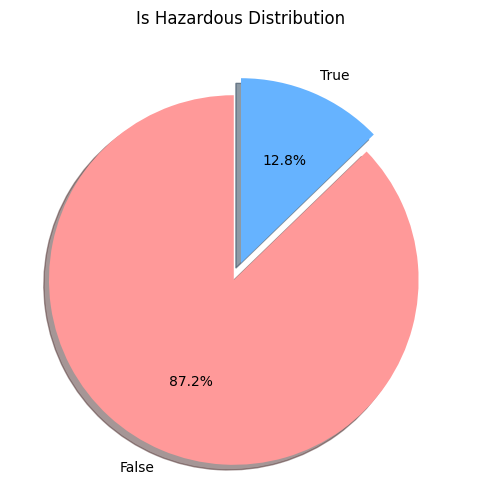

In [18]:
labels = df['is_hazardous'].value_counts().index
sizes = df['is_hazardous'].value_counts()
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Is Hazardous Distribution')
plt.show()



In [19]:
df['is_hazardous'] = df['is_hazardous'].astype(int)

In [20]:
df['is_hazardous'].value_counts()

,count
is_hazardous,
0,295009
1,43162


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338171 non-null  int64  
 1   name                    338171 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338171 non-null  object 
 6   relative_velocity       338171 non-null  float64
 7   miss_distance           338171 non-null  float64
 8   is_hazardous            338171 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 25.8+ MB


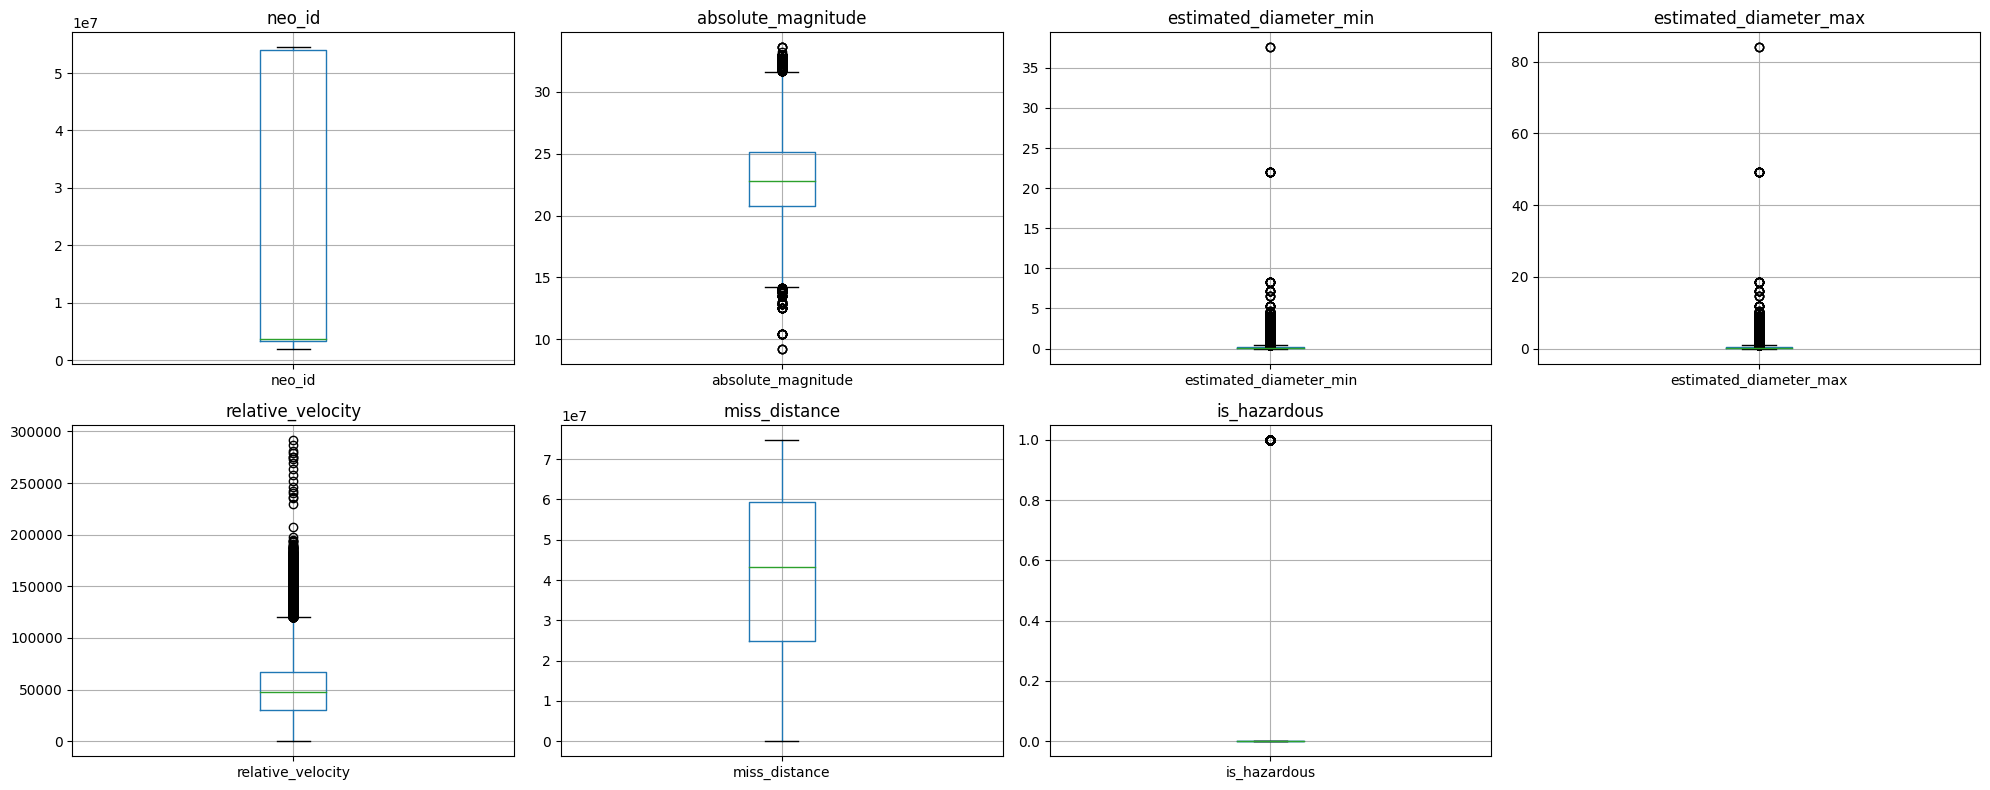

In [22]:
numerical_columns = df.select_dtypes(include=['int','float64']).columns

plt.figure(figsize=(20, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2,4 , i)
    df.boxplot(column=col)
    plt.title(col)
    plt.tight_layout()

plt.show()

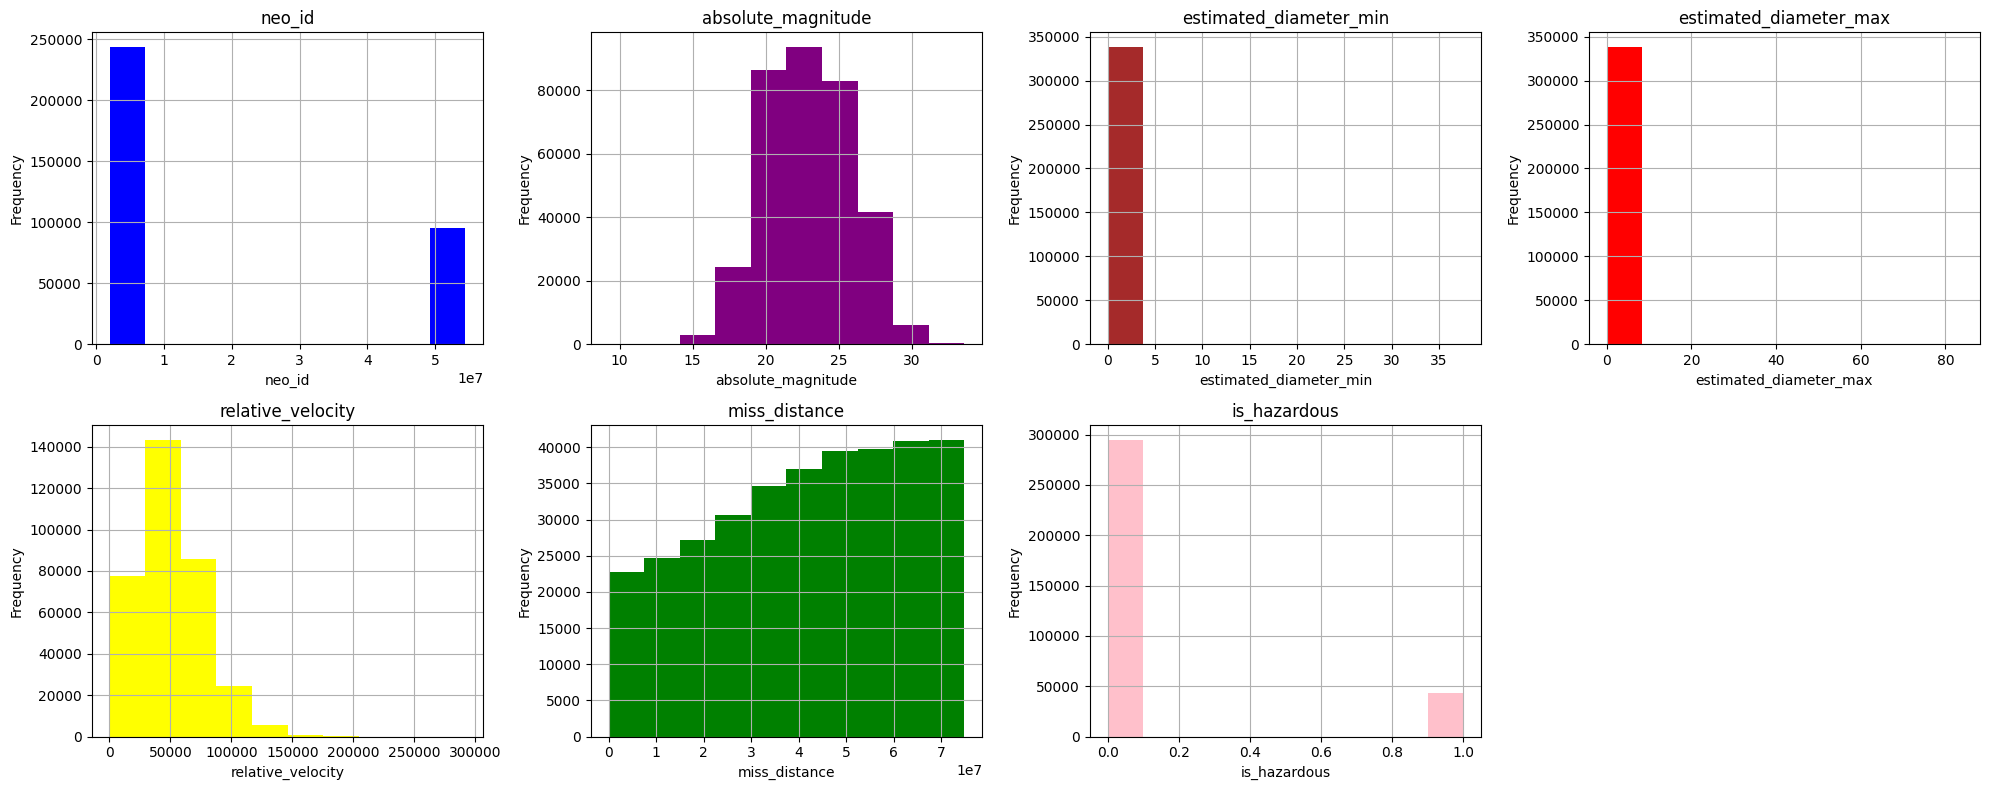

In [23]:
numerical_columns = df.select_dtypes(include=['int','float64']).columns

plt.figure(figsize=(20, 8))
colors = ['blue', 'purple', 'brown', 'red', 'yellow','Green','pink']
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    df[col].hist(color=colors[i-1])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()

plt.show()

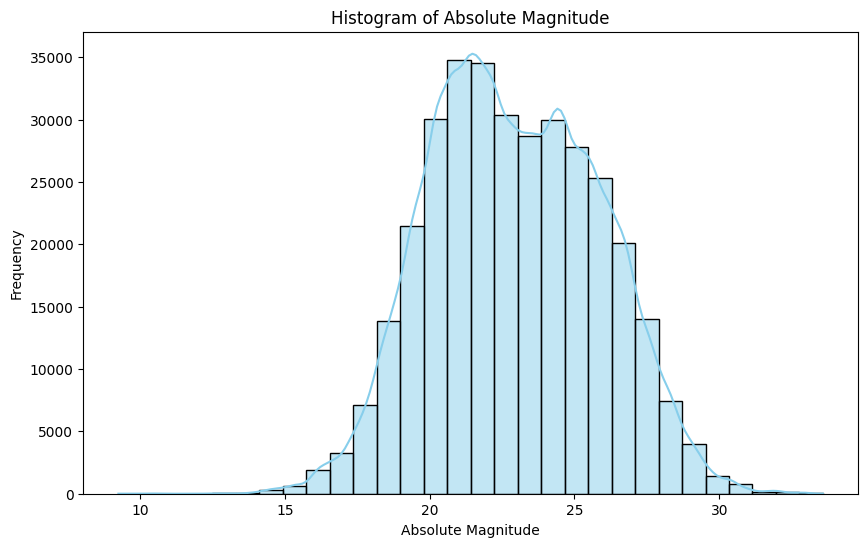

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['absolute_magnitude'], bins=30, kde=True, color='skyblue')
plt.title('Histogram of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.show()


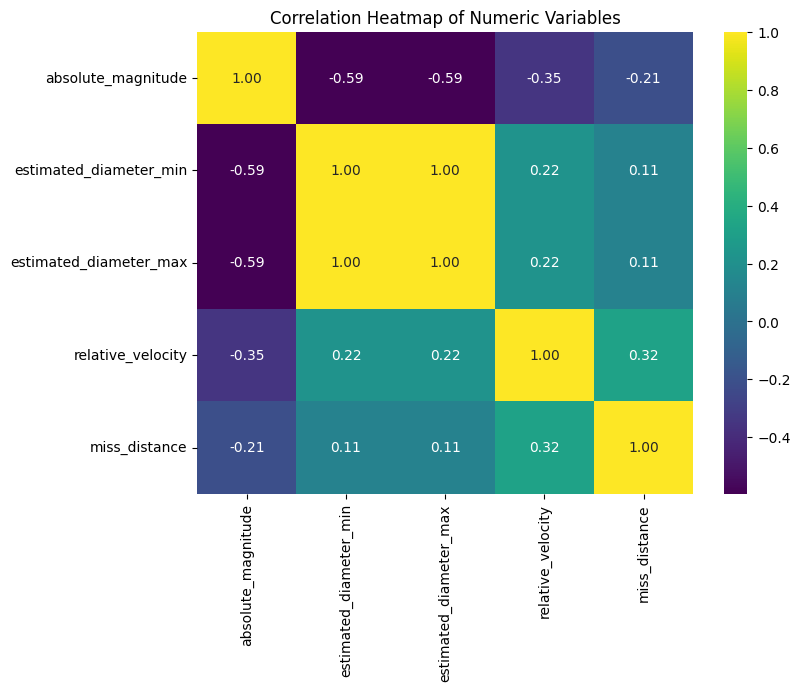

In [25]:
numeric_df = df.select_dtypes(include=['int32','float64'])

correlation_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [26]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,0
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,1
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,0
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,0
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,0


In [27]:
df['average_diameter'] = (df['estimated_diameter_min'] + df['estimated_diameter_max']) / 2

# Drop the unwanted columns
df = df.drop(columns=['estimated_diameter_min', 'estimated_diameter_max'])

# Reorder columns to place 'average_diameter' in the 5th position
cols = df.columns.tolist()
position = 4  # 5th position in 0-based index
new_order = cols[:position] + ['average_diameter'] + cols[position:]

# Reorder the DataFrame
df = df[new_order]

print(df)

          neo_id                name  absolute_magnitude orbiting_body  \
0        2162117  162117 (1998 SD15)              19.140         Earth   
1        2349507    349507 (2008 QY)              18.500         Earth   
2        2455415    455415 (2003 GA)              21.450         Earth   
3        3132126           (2002 PB)              20.630         Earth   
4        3557844           (2011 DW)              22.700         Earth   
...          ...                 ...                 ...           ...   
338194  54403809          (2023 VS4)              28.580         Earth   
338195  54415298          (2023 XW5)              28.690         Earth   
338196  54454871          (2024 KJ7)              21.919         Earth   
338197  54456245           (2024 NE)              23.887         Earth   
338198  54460573          (2024 NH3)              22.951         Earth   

        average_diameter  relative_velocity  miss_distance  is_hazardous  \
0               0.639061       7174

In [28]:
df.head()

,neo_id,name,absolute_magnitude,orbiting_body,average_diameter,relative_velocity,miss_distance,is_hazardous,average_diameter
0,2162117,162117 (1998 SD15),19.14,Earth,0.639061,71745.401048,5.814362e+07,0,0.639061
1,2349507,349507 (2008 QY),18.50,Earth,0.858109,109949.757148,5.580105e+07,1,0.858109
2,2455415,455415 (2003 GA),21.45,Earth,0.220568,24865.506798,6.720689e+07,0,0.220568
3,3132126,(2002 PB),20.63,Earth,0.321768,78890.076805,3.039644e+07,0,0.321768
4,3557844,(2011 DW),22.70,Earth,0.124035,56036.519484,6.311863e+07,0,0.124035


In [29]:
df = df.iloc[:, :-1]

In [30]:
df

,neo_id,name,absolute_magnitude,orbiting_body,average_diameter,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,Earth,0.639061,71745.401048,5.814362e+07,0
1,2349507,349507 (2008 QY),18.500,Earth,0.858109,109949.757148,5.580105e+07,1
2,2455415,455415 (2003 GA),21.450,Earth,0.220568,24865.506798,6.720689e+07,0
3,3132126,(2002 PB),20.630,Earth,0.321768,78890.076805,3.039644e+07,0
4,3557844,(2011 DW),22.700,Earth,0.124035,56036.519484,6.311863e+07,0
...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,Earth,0.008271,56646.985988,6.406548e+07,0
338195,54415298,(2023 XW5),28.690,Earth,0.007862,21130.768947,2.948883e+07,0
338196,54454871,(2024 KJ7),21.919,Earth,0.177723,11832.041031,5.346078e+07,0
338197,54456245,(2024 NE),23.887,Earth,0.071803,56198.382733,5.184742e+06,0


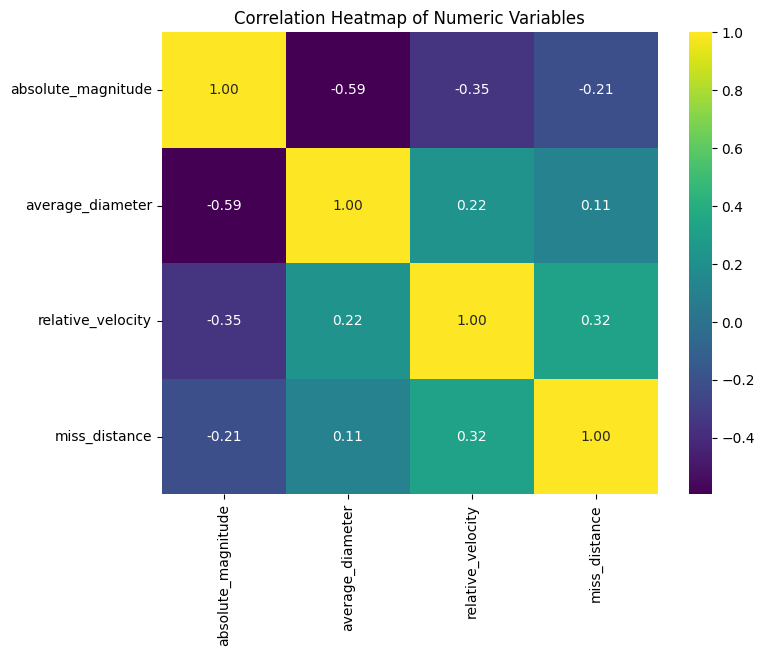

In [31]:
numeric_df = df.select_dtypes(include=['int32','float64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [32]:
import plotly.express as px
import plotly.graph_objects as go

correlation_matrix = df[['absolute_magnitude', 'average_diameter', 'relative_velocity', 'miss_distance', 'is_hazardous']].corr()
fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values, x=correlation_matrix.columns, y=correlation_matrix.columns, colorscale='Viridis'))
fig.update_layout(title='Correlation Heatmap', xaxis_title='Variables', yaxis_title='Variables')
fig.show()


# 3. Data Preprocessing:

In [33]:
df=df[['absolute_magnitude', 'average_diameter', 'relative_velocity', 'is_hazardous']]

In [34]:
df.head()

,absolute_magnitude,average_diameter,relative_velocity,is_hazardous
0,19.14,0.639061,71745.401048,0
1,18.50,0.858109,109949.757148,1
2,21.45,0.220568,24865.506798,0
3,20.63,0.321768,78890.076805,0
4,22.70,0.124035,56036.519484,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338171 entries, 0 to 338198
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   absolute_magnitude  338171 non-null  float64
 1   average_diameter    338171 non-null  float64
 2   relative_velocity   338171 non-null  float64
 3   is_hazardous        338171 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 12.9 MB


In [36]:
df.describe()

,absolute_magnitude,average_diameter,relative_velocity,is_hazardous
count,338171.000000,338171.000000,338171.000000,338171.000000
mean,22.932525,0.255345,51060.017994,0.127634
std,2.911216,0.507877,26399.922830,0.333682
min,9.250000,0.000827,203.346433,0.000000
25%,20.740000,0.041072,30710.626399,0.000000
50%,22.800000,0.118452,47557.046397,0.000000
75%,25.100000,0.305874,66673.223798,0.000000
max,33.580000,60.749487,291781.106613,1.000000


In [37]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_features = scaler.fit_transform(df[['absolute_magnitude', 'average_diameter', 'relative_velocity']])

# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=['absolute_magnitude', 'average_diameter', 'relative_velocity'])


In [38]:
scaled_df.describe()

,absolute_magnitude,average_diameter,relative_velocity
count,3.381710e+05,3.381710e+05,3.381710e+05
mean,2.048018e-15,-3.866087e-17,1.203194e-15
std,1.000001e+00,1.000001e+00,1.000001e+00
min,-4.699941e+00,-5.011423e-01,-1.926398e+00
25%,-7.531313e-01,-4.219013e-01,-7.708137e-01
50%,-4.552226e-02,-2.695406e-01,-1.326889e-01
75%,7.445267e-01,9.949038e-02,5.914119e-01
max,3.657403e+00,1.191120e+02,9.118263e+00


In [39]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = scaled_df
y = df['is_hazardous']

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)


In [40]:
X_resampled.describe()

,absolute_magnitude,average_diameter,relative_velocity
count,590018.000000,590018.000000,590018.000000
mean,-0.384899,0.185191,0.209927
std,0.928896,0.999914,1.051233
min,-4.699941,-0.501142,-1.926398
25%,-0.978629,-0.325031,-0.582658
50%,-0.556321,-0.040166,0.069255
75%,0.157142,0.312098,0.825655
max,3.657403,119.112015,9.118263


In [41]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler()

# Apply undersampling to the dataset
X_resampled, y_resampled = undersampler.fit_resample(X, y)


In [42]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86324 entries, 45626 to 338163
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   absolute_magnitude  86324 non-null  float64
 1   average_diameter    86324 non-null  float64
 2   relative_velocity   86324 non-null  float64
dtypes: float64(3)
memory usage: 2.6 MB


In [43]:
y_resampled.info()

<class 'pandas.core.series.Series'>
Index: 86324 entries, 45626 to 338163
Series name: is_hazardous
Non-Null Count  Dtype
--------------  -----
86324 non-null  int64
dtypes: int64(1)
memory usage: 1.3 MB


# 4. Model Training and Evaluation:

# 4.1 LogisticRegression

In [44]:
from sklearn.linear_model import LogisticRegression

# Initialize the model with class_weight='balanced'
model = LogisticRegression(class_weight='balanced')

# Fit the model
model.fit(X, y)


LogisticRegression(class_weight='balanced')

In [45]:
from sklearn.metrics import balanced_accuracy_score

# Predict using the model
y_pred = model.predict(X)

# Calculate balanced accuracy
balanced_accuracy = balanced_accuracy_score(y, y_pred)
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')


Balanced Accuracy: 0.80


In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Apply logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

Accuracy: 0.8732608856361351
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     59088
           1       0.36      0.00      0.01      8547

    accuracy                           0.87     67635
   macro avg       0.62      0.50      0.47     67635
weighted avg       0.81      0.87      0.82     67635



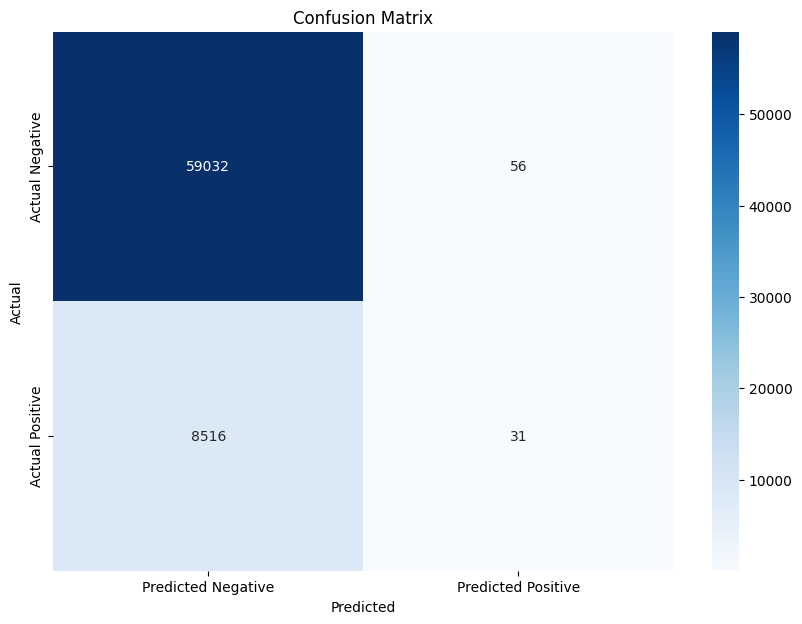

In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4.2 SVM

In [49]:
from sklearn.svm import SVC
model = SVC()

In [50]:
model.fit(X_train, y_train)

SVC()

In [51]:
model.score(X_test, y_test)

0.8736896577215939

**Tune Parameters**

**1. Regularization (C)**

In [52]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.8736896577215939

**2. Gamma**

In [53]:
model_g = SVC(gamma=0.01)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.8736305167442892

**3. Kernel**

In [56]:
# @title Default title text
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [57]:
model_linear_kernal.score(X_test, y_test)

0.8736305167442892

# 4.3 Decision Tree

Accuracy: 87.42%


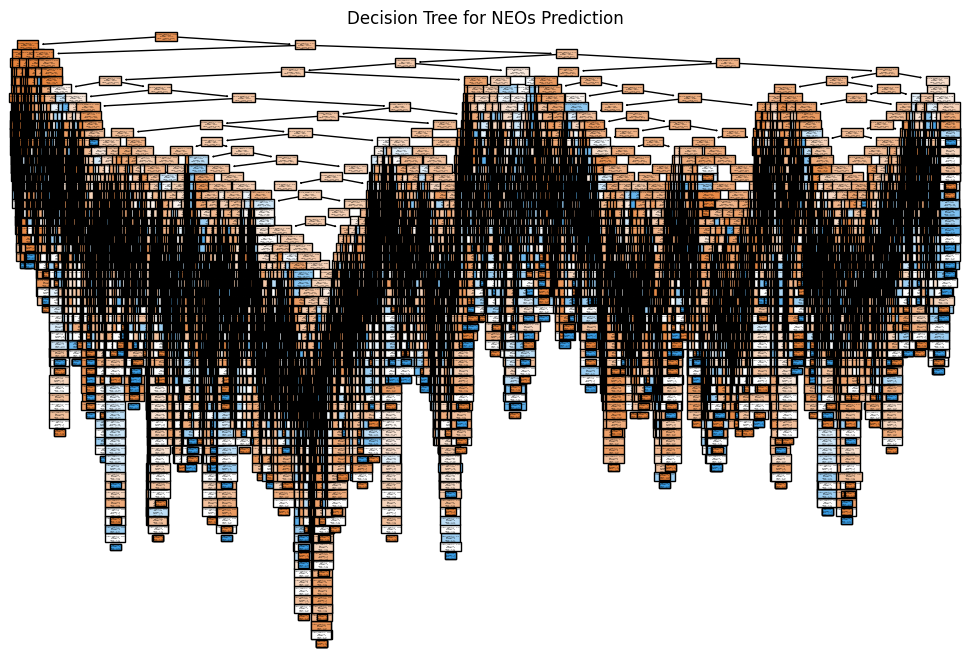

In [61]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['absolute_magnitude', 'average_diameter', 'relative_velocity'], class_names=['True', 'Fales'])
plt.title('Decision Tree for NEOs Prediction')
plt.show()

# 4.4 KNN

In [63]:
df_feat = pd.DataFrame(scaled_df,columns=df.columns[:-1])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,df['is_hazardous'],
                                                    test_size=0.30)

In [66]:
knn = KNeighborsClassifier(n_neighbors=3)

In [67]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

**Predictions and Evaluations**

Let's evaluate our KNN model!

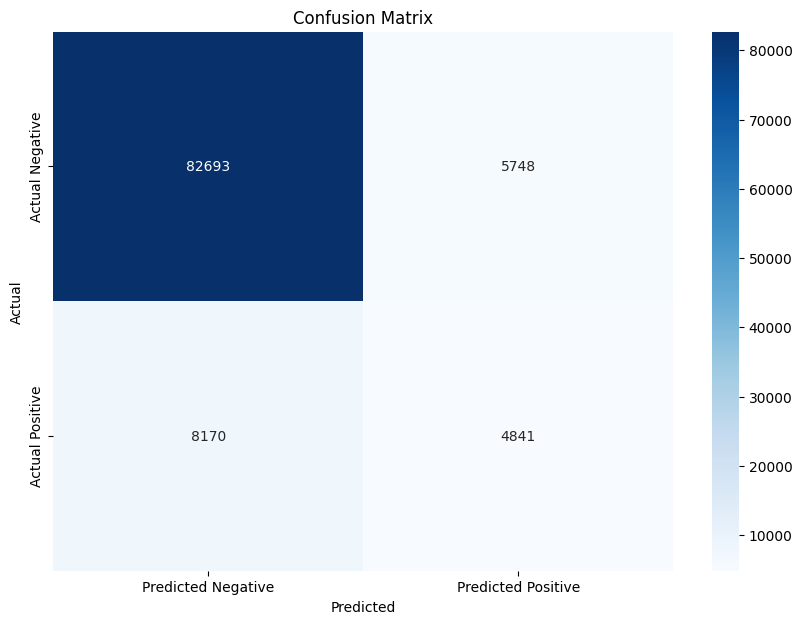

In [70]:
# Ensure that y_pred is generated using the same X_test data used to create y_test
y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [71]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score:", accuracy)

Accuracy Score: 0.8628119701928005


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92     88441
           1       0.46      0.37      0.41     13011

    accuracy                           0.86    101452
   macro avg       0.68      0.65      0.67    101452
weighted avg       0.85      0.86      0.86    101452



**Choosing a K Value**

Let's go ahead and use the elbow method to pick a good K Value:

In [74]:
error_rate = []

# Will take some time
for i in range(1,41):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(sum((pred_i != y_test)))

In [75]:
len(error_rate)


40

Text(0, 0.5, 'Error Rate')

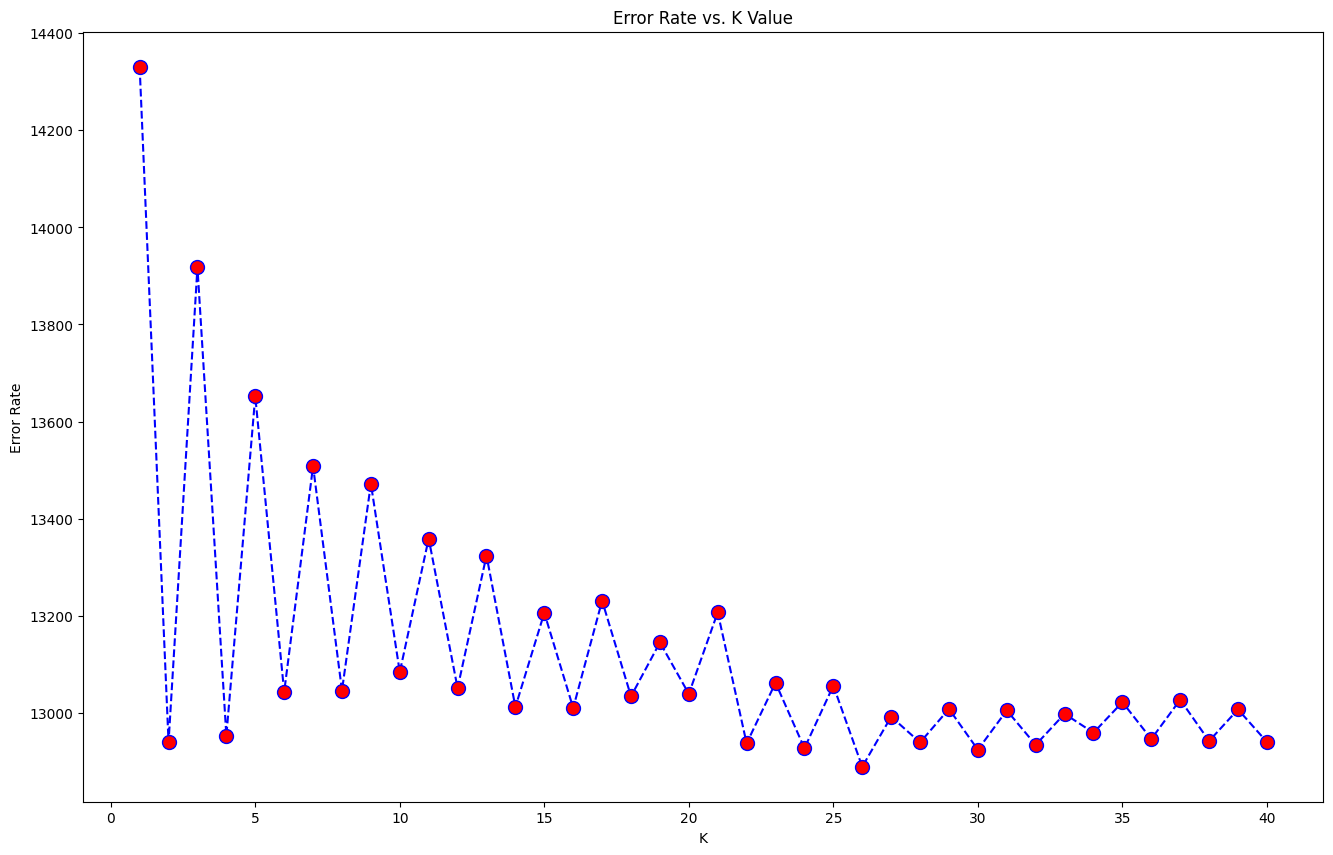

In [76]:
plt.figure(figsize=(16,10))
plt.plot(range(1,41),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

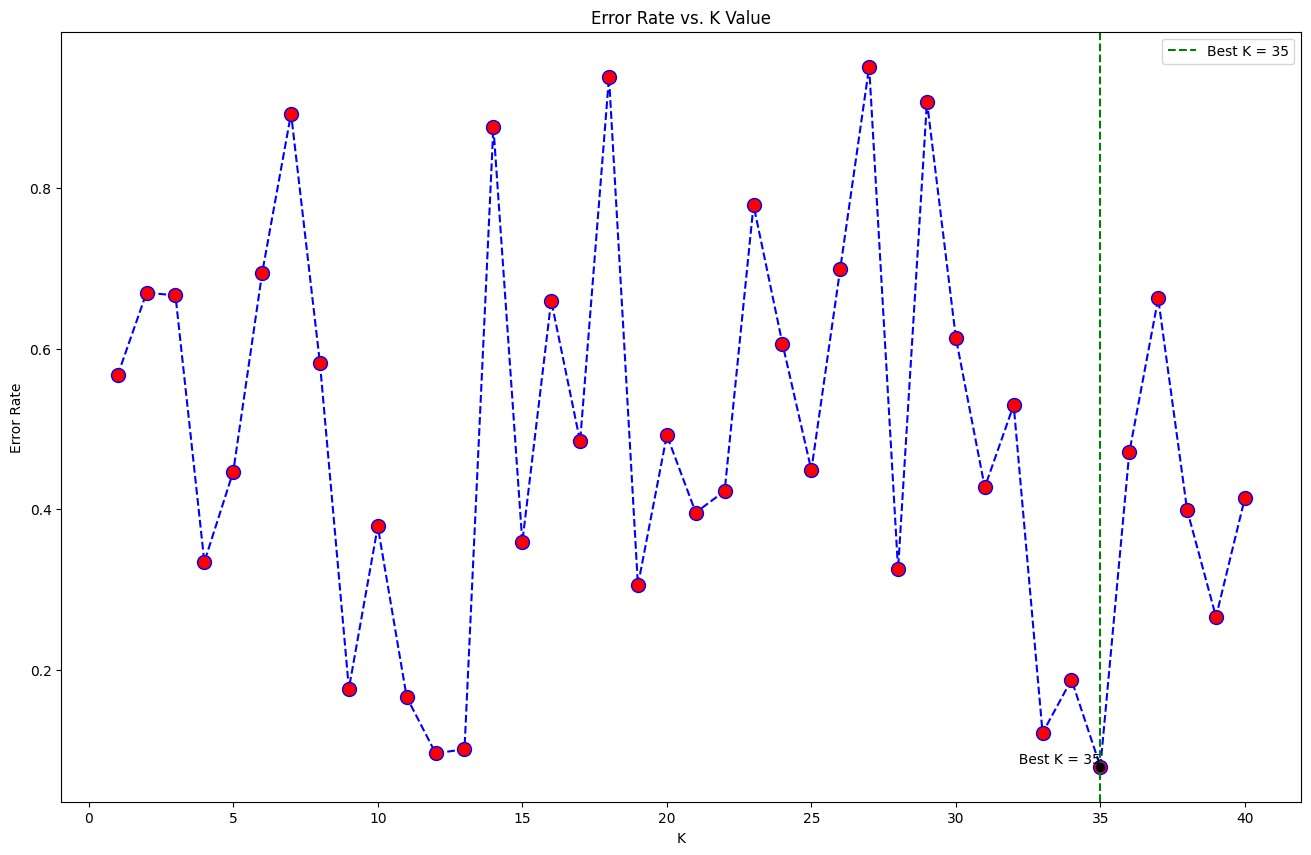

In [77]:
import matplotlib.pyplot as plt
import numpy as np

error_rate = np.random.rand(40)
k_values = range(1, 41)

# Find the best k
best_k_index = np.argmin(error_rate)
best_k = k_values[best_k_index]

plt.figure(figsize=(16, 10))
plt.plot(k_values, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

plt.axvline(x=best_k, color='green', linestyle='--', label=f'Best K = {best_k}')
plt.scatter(best_k, error_rate[best_k_index], color='black', zorder=5)
plt.text(best_k, error_rate[best_k_index], f'  Best K = {best_k}', verticalalignment='bottom', horizontalalignment='right')

plt.legend()
plt.show()


In [78]:
# NOW WITH K=25
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
accuracy = accuracy_score(y_test, pred)

print("Accuracy Score:", accuracy)
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=25


Accuracy Score: 0.8713085991404802


[[86379  2062]
 [10994  2017]]


              precision    recall  f1-score   support

           0       0.89      0.98      0.93     88441
           1       0.49      0.16      0.24     13011

    accuracy                           0.87    101452
   macro avg       0.69      0.57      0.58    101452
weighted avg       0.84      0.87      0.84    101452



In [80]:
# NOW WITH K=35
knn = KNeighborsClassifier(n_neighbors=35)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=35')
print('\n')
accuracy = accuracy_score(y_test, pred)

print("Accuracy Score:", accuracy)
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=35


Accuracy Score: 0.8716437329968852


[[86795  1646]
 [11376  1635]]


              precision    recall  f1-score   support

           0       0.88      0.98      0.93     88441
           1       0.50      0.13      0.20     13011

    accuracy                           0.87    101452
   macro avg       0.69      0.55      0.57    101452
weighted avg       0.83      0.87      0.84    101452

